In [1]:
from infrastructure.classes import Experiment, TrainParameters
from infrastructure.training import train
from pushforward_operators import ConvexPotentialFlow, NeuralQuantileRegression
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float32, device=torch.device("cpu")),
    dataset_name="picnn_fnlvqr_banana",
    dataset_number_of_points=10**4,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="convex_potential_flow",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=8,
        number_of_hidden_layers=4,
        n_blocks=2,
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=0,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

# model = train(experiment)


model = NeuralQuantileRegression.load_class("../../experiments/picnn_fnlvqr_banana/neural_quantile_regression_y/weights.pth")
_ = model.eval()

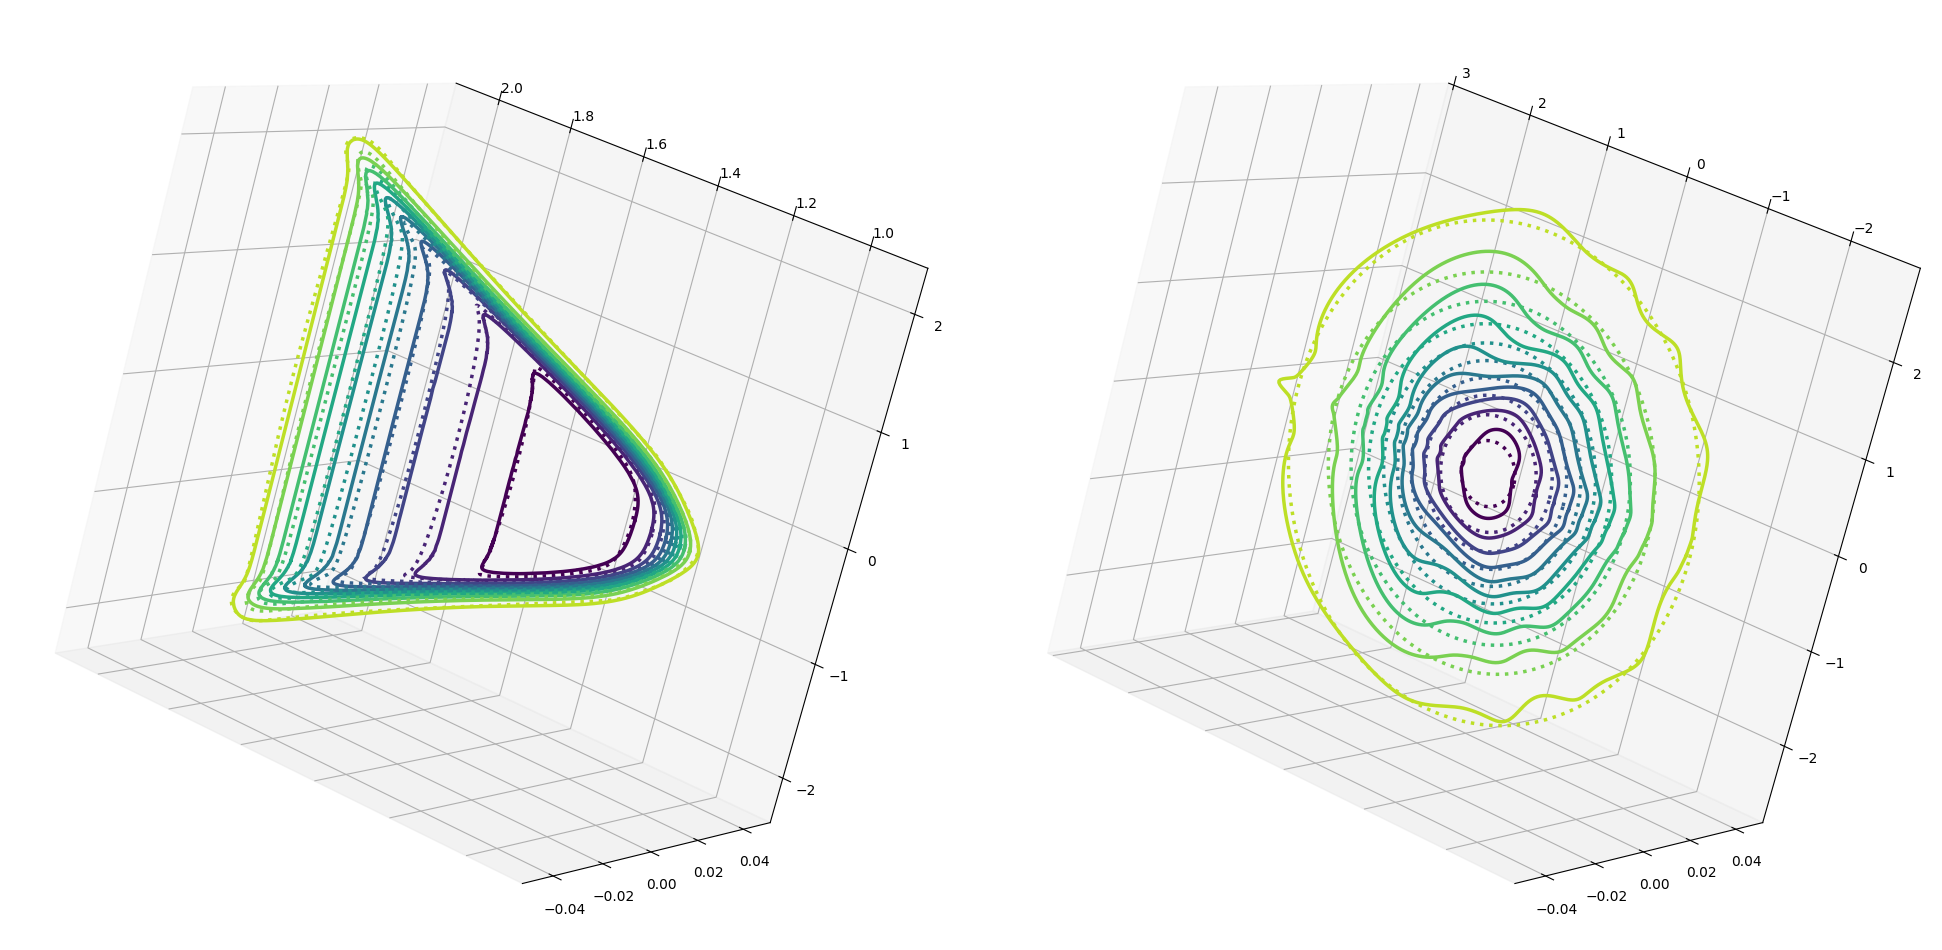

In [2]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_dataset
from datasets import PICNN_FNLVQR_Banana
dataset = PICNN_FNLVQR_Banana(tensor_parameters=experiment.tensor_parameters)

plot_quantile_levels_from_dataset(
    model=model,
    dataset=dataset,
    conditional_value=torch.tensor([[1.5]]),
    number_of_quantile_levels=10,
    tensor_parameters=experiment.tensor_parameters
)